In [352]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings


warnings.filterwarnings('ignore')


data = None
with open('Москва_2021.txt') as file:
    data = [int(line.rstrip()) for line in file]


In [353]:
def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_avg(data: list):
    return sum(data) / len(data)


def count_avg(data: list):
    return sum(data) / len(data)

def count_mathematical_expectation(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = 0

    for val in num_of_occurrences:
        mat_exp += (num_of_occurrences[val] / len(data)) * val

    return mat_exp


def count_dispersion(data: list):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    mat_exp = count_mathematical_expectation(data)
    dispersion = 0

    for val in num_of_occurrences:
        dispersion += (val - mat_exp) ** 2 * (num_of_occurrences[val] / len(data))
    
    return dispersion


def count_sko(data):
    return count_dispersion(data) ** 0.5


def count_var_coef(data):
    return count_sko(data) / count_mathematical_expectation(data)

def count_moda(data):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    max_val = max(num_of_occurrences, key=num_of_occurrences.get)
    max_val_freq = num_of_occurrences[max_val] / len(data)

    return [max_val, num_of_occurrences[max_val], len(data)]

def count_razmax(data):
    return max(data) - min(data)

def find_second_max_and_min(data):

    sorted_data = sorted(set(data))
    
    return sorted_data[1], sorted_data[-2]

def find_k_momentum(data: list, k: int):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 
    
    mat_exp = count_mathematical_expectation(data)

    momentum = 0

    for val in num_of_occurrences:
        momentum += (val - mat_exp) ** k * (num_of_occurrences[val] / len(data))
    
    return momentum

def count_asymmetry(data):
    return find_k_momentum(data, 3) / (count_sko(data) ** 3)

def count_excess(data):
    return find_k_momentum(data, 4) / (count_sko(data) ** 4) - 3


def count_median(data):
    if len(data) % 2 == 1:
        m = (len(data)-1) // 2
        return sorted(data)[m+1]
    else:
        m = len(data) // 2
        return (sorted(data)[m] + sorted(data)[m+1])/2


def count_frequencies(data):
    num_of_occurrences = {}

    for val in data:
        if val not in num_of_occurrences:
            num_of_occurrences[val] = 1
        else:
            num_of_occurrences[val] += 1 

    return num_of_occurrences

1. По критерию Пирсона при уровне значимости α = 0,05 проверить
нулевую гипотезу о нормальном распределении:

а) случайной величины «возраст». Для этого разбить массив исходных
данных на 7 групп с равными интервалами (концы интервала –
целые).

б) случайной величины «средний возраст», используя выборку
средних, полученную в лабораторной работе №2.

a)

In [354]:
def divide_to_same_intervals(data: list, n_parts: int): 
    data = sorted(data)
    
    
    curr_interval_size = 1
    
    interval_is_ok = True
    
    prev_begin_id = 0
    while interval_is_ok:        
        curr_n_parts = 0
        begin_id = 0
        end_id = 1

        # all_intervals = []
        while end_id < len(data) and curr_n_parts <= n_parts:
            while end_id < len(data) and data[end_id] - data[begin_id] <= curr_interval_size:
                end_id += 1

            # print(curr_n_parts,data[begin_id-1], data[begin_id], '|',data[end_id-1],data[end_id], data[end_id+1])
            # all_intervals.append(data[begin_id:end_id])
            if end_id-1 < len(data) and data[end_id-1] - data[begin_id] != curr_interval_size:
                interval_is_ok = False
                break

            
            prev_begin_id = begin_id
            begin_id = end_id
            curr_n_parts += 1

        if not interval_is_ok:
            break

        elif end_id >= len(data) and curr_n_parts <= n_parts:
            if data[len(data) - 1] - data[prev_begin_id] == curr_interval_size:
                curr_interval_size += 1
        
            interval_is_ok = False
        

        else:
            curr_interval_size += 1


    final_interval_size = curr_interval_size - 1
    
    curr_n_parts = 0
    begin_id = 0
    end_id = 1
    all_intervals = []

    while end_id < len(data) and curr_n_parts < n_parts:
        while end_id < len(data) and data[end_id] - data[begin_id] <= final_interval_size:
            end_id += 1

        all_intervals.append(data[begin_id:end_id])
        begin_id = end_id 
        curr_n_parts += 1

    return all_intervals, final_interval_size


In [355]:
def gauss_func(x):
    return 1 / ((2 * math.pi) ** 0.5) * math.e ** ( - (x) ** 2 / (2) )


def count_theoretical_frequencies(data: list, h: int):
    avg = count_avg(data)
    # disp = count_dispersion(data)
    sko = count_sko(data)
    n = len(data)

    freqs = {}

    for val in data:
        freqs[val] = h * n / sko * gauss_func((val - avg)/sko)

    return freqs

interval_size 6
k 4
35.422777965528894 137.78847744681434 11.738333674198154
{'14-20': 971, '21-27': 810, '28-34': 1115, '35-41': 1006, '42-48': 690, '49-55': 1060, '56-62': 266}
{'14-20': 453.5081286409892, '21-27': 751.6238972258046, '28-34': 1124.0944307523448, '35-41': 1178.0460716427365, '42-48': 865.125309162156, '49-55': 618.184876031591, '56-62': 134.8017319301998}


<BarContainer object of 7 artists>

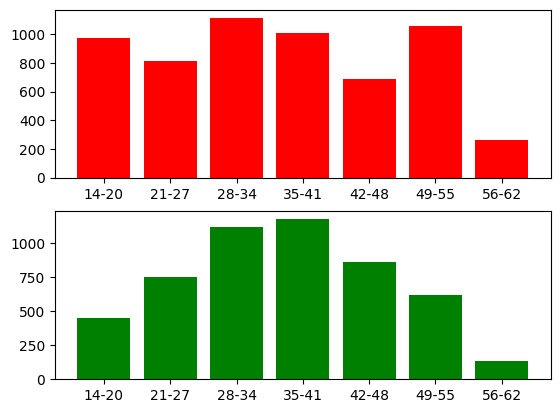

In [356]:
# уровень значимости
a = 0.05


all_samples, h = divide_to_same_intervals(data, 7)
print('interval_size',h)
k = 7 - 2 - 1 # это колво степеней свободы = 4 => pirson = 9.4877
print('k',k)

pirson = 9.4877

group_freqs = {}
group_mids = {}
group_n_mids = {}
group_mid_x_n = {}
group_mid_x_n2 = {}

# avg = count_avg(data)
# sko = count_sko(data)

n_mids = 0
sum_mids = 0
sum_mids2 = 0
for sample in all_samples:
    group_freqs[str(min(sample))+'-'+str(max(sample))] = sample.count(sample[len(sample)//2])
    # group_mids[str(min(sample))+'-'+str(max(sample))] = sample[len(sample)//2]
    # group_n_mids[str(min(sample))+'-'+str(max(sample))] = sample.count(sample[len(sample)//2])
    # sample_mid = sample[len(sample)//2] * sample.count(sample[len(sample)//2])
    sum_mids += sample[len(sample)//2] * sample.count(sample[len(sample)//2])
    sum_mids2 += (sample[len(sample)//2] ** 2 )* sample.count(sample[len(sample)//2])
    
    n_mids += sample.count(sample[len(sample)//2])

samples_avg = sum_mids / n_mids
samples_dispersion = sum_mids2 / n_mids - (samples_avg**2)
samples_sko = samples_dispersion ** 0.5

print(samples_avg,samples_dispersion, samples_sko)

theoretical_freqs = {}
for sample in all_samples:
    z_i = (sample[len(sample)//2]-samples_avg)/samples_sko
    theoretical_freq = h * n_mids / samples_sko * gauss_func(z_i)

    theoretical_freqs[str(min(sample))+'-'+str(max(sample))] =theoretical_freq


print(group_freqs)
print(theoretical_freqs)

# plt.bar(list(group_freqs.keys()), group_freqs.values(), color='r')
# plt.bar(list(theoretical_freqs.keys()), theoretical_freqs.values(), color='g')

fig, axs = plt.subplots(2)
axs[0].bar(list(group_freqs.keys()), group_freqs.values(), color='r')
axs[1].bar(list(theoretical_freqs.keys()), theoretical_freqs.values(), color='g')

In [357]:
pirson = 0

for val in group_freqs:
    pirson += (group_freqs[val] - theoretical_freqs[val] ) ** 2 / theoretical_freqs[val]
print(pirson)

1099.141977861605
